In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd
from keras.preprocessing.image import load_img , ImageDataGenerator
from keras import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from sklearn.model_selection import train_test_split
import seaborn as sns
import zipfile
import os
import pickle
import time
import random
import tqdm
from google.colab import drive
import PIL
from PIL import Image

In [4]:
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
zip_file = '/content/drive/MyDrive/dataset.zip'
z = zipfile.ZipFile(zip_file, 'r')
z.extractall()
print(os.listdir())

['.config', 'drive', 'dataset', 'sample_data']


In [6]:
input_path = []
label = []

for class_name in os.listdir('dataset'):
  for path in os.listdir('dataset/' + class_name):
    if class_name == 'cats':
      label.append(0)
    else:
      label.append(1)
    input_path.append(os.path.join('dataset', class_name, path))
print(input_path[0], label[0])

dataset/cats/cat.361.jpg 0


In [7]:
df = pd.DataFrame()
df['images'] = input_path
df['label'] = label
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,images,label
0,dataset/dogs/dog.4643.jpg,1
1,dataset/cats/cat.4279.jpg,0
2,dataset/cats/cat.3053.jpg,0
3,dataset/dogs/dog.2563.jpg,1
4,dataset/dogs/dog.4509.jpg,1


In [8]:
df['label'] = df['label'].astype('str')

In [9]:
train, test = train_test_split(df, test_size=0.2, random_state=42)

In [10]:
train_generator = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

val_generator = ImageDataGenerator(rescale = 1./255)

train_iterator = train_generator.flow_from_dataframe(
    train, 
    x_col = 'images', 
    y_col = 'label', 
    target_size = (128, 128), 
    batch_size = 512, 
    class_mode = 'binary'
)

val_iterator = val_generator.flow_from_dataframe(
    test, 
    x_col = 'images', 
    y_col = 'label', 
    target_size = (128, 128), 
    batch_size = 512, 
    class_mode = 'binary'
)

Found 8022 validated image filenames belonging to 2 classes.
Found 2006 validated image filenames belonging to 2 classes.


In [11]:
model = Sequential([
                    Conv2D(16, (3,3), activation='relu', input_shape=(128,128,3)),
                    MaxPool2D((2,2)),
                    Conv2D(32, (3,3), activation='relu'),
                    MaxPool2D((2,2)),
                    Conv2D(64, (3,3), activation='relu'),
                    MaxPool2D((2,2)),
                    Flatten(),
                    Dense(512, activation='relu'),
                    Dense(1, activation='sigmoid')
])

In [12]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0

In [13]:
history = model.fit(train_iterator, epochs=10, validation_data=val_iterator)

Epoch 1/10
16/16 [==============================] - 175s 11s/step - loss: 0.8459 - accuracy: 0.5076 - val_loss: 0.6901 - val_accuracy: 0.5628
Epoch 2/10
16/16 [==============================] - 165s 10s/step - loss: 0.6860 - accuracy: 0.5646 - val_loss: 0.6682 - val_accuracy: 0.6012
Epoch 3/10
16/16 [==============================] - 170s 10s/step - loss: 0.6560 - accuracy: 0.6162 - val_loss: 0.6200 - val_accuracy: 0.6535
Epoch 4/10
16/16 [==============================] - 170s 10s/step - loss: 0.6230 - accuracy: 0.6578 - val_loss: 0.5918 - val_accuracy: 0.6894
Epoch 5/10
16/16 [==============================] - 166s 10s/step - loss: 0.6033 - accuracy: 0.6668 - val_loss: 0.5683 - val_accuracy: 0.7014
Epoch 6/10
16/16 [==============================] - 164s 10s/step - loss: 0.5863 - accuracy: 0.6889 - val_loss: 0.5422 - val_accuracy: 0.7218
Epoch 7/10
16/16 [==============================] - 172s 11s/step - loss: 0.5688 - accuracy: 0.7073 - val_loss: 0.5435 - val_accuracy: 0.7089
Epoch 

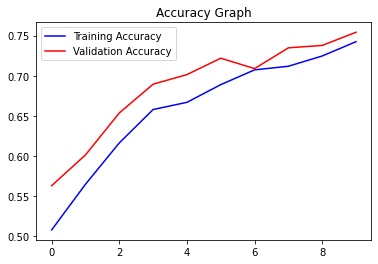

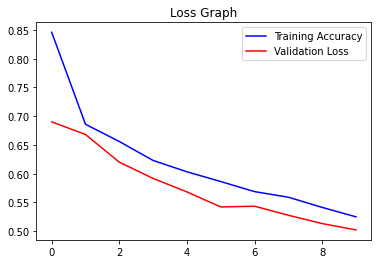

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs, loss, 'b', label='Training Accuracy')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()